- реализовать нейронную сеть в схеме AlexNet на сifar10.
- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
    </li>

In [1]:
from __future__ import print_function
import tensorflow.keras as keras # расскоментируйте эту строку, чтобы начать обучение
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = [20, 7]

classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [2]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 5
data_augmentation = True
num_predictions = 20

In [3]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [4]:
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
def model_compile(_input_, _output_, statistic=dict(), num_test=0, repeat=1, batch_size=1000, epochs=10, note='',\
                  train_images=None, train_labels=None, verbose=1):
    
    statistic_out = dict()
    history_list = dict()

    max_accuracy = 0
    max_val_accuracy = 0

    for i in range(repeat):
        model = Model(inputs=_input_,outputs=_output_)
        
        if i == 0:
            model.summary()

        model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

        history = model.fit(
            train_images,
            train_labels,
            epochs=epochs,
            batch_size=batch_size,
            validation_split = 0.2, 
            verbose=verbose
        )
        
        history_list[i] = history.history

        if(history.history["val_accuracy"][-1] > max_val_accuracy):
            max_val_accuracy = history.history["val_accuracy"][-1]
            max_accuracy = history.history["accuracy"][-1]
        
        print(f'accuracy: {history.history["accuracy"][-1]}, val_accuracy: {history.history["val_accuracy"][-1]}')

    for i in range(len(history_list)):
        plt.plot(history_list[i]['val_accuracy'], "--",label=f'val_{i}')
        plt.plot(history_list[i]['accuracy'], label=f'train_{i}')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('точность сети от эпох')
    plt.show()

    statistic_out['val_accuracy'] = max_val_accuracy
    statistic_out['accuracy'] = max_accuracy
    statistic_out['note'] = note

    statistic[num_test] = statistic_out

    return statistic

num_test = 0
statistic=dict()

In [6]:
input = Input(shape=(227, 227, 3))

x = Conv2D(96, (11, 11), strides=4, padding='valid', activation='relu')(input)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)
x = Conv2D(256, (5, 5), strides=1, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)
x = Conv2D(384, (3, 3), strides=1, padding='same', activation='relu')(x)
x = Conv2D(384, (3, 3), strides=1, padding='same', activation='relu')(x)
x = Conv2D(256, (3, 3), strides=1, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=input,outputs=x)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)      

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 96)          34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 384)         885120    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 384)        

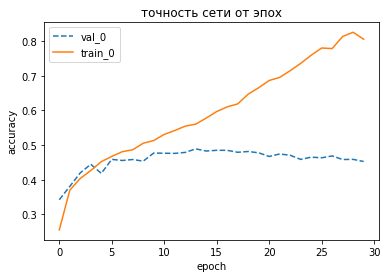

In [7]:
num_test = 1
statistic=dict()
note = 'Изначальная сеть'

input = Input(shape=(32, 32, 3))

x = Conv2D(96, (11, 11), strides=4, padding='same', activation='relu')(input)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
x = Conv2D(256, (5, 5), strides=1, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
x = Conv2D(384, (3, 3), strides=1, padding='same', activation='relu')(x)
x = Conv2D(384, (3, 3), strides=1, padding='same', activation='relu')(x)
x = Conv2D(256, (3, 3), strides=1, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

statistic = model_compile(input, x, statistic=statistic, num_test=num_test, batch_size=100, epochs=30, note=note, train_images=x_train, train_labels=y_train)

Собрал AlexNet, но она на входные данные (227, 227, 3), как адаптировать к (32, 32, 3). Я адаптировал с сохнаненим слоев, но на выходе свертки получается размер (1, 1, 256), что отрицательно влияет на результат. К томуже такая сеть уже не AlexNet.
Обучил полученую сеть, она имеет низкую точность и переобучается.

- обучить сверточную нейронную сеть на датасете fashion-mnist
- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
    </li>

In [8]:
from tensorflow.keras.datasets import fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [9]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [10]:
num_classes = 10

train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

print(train_labels.shape) # (60000, 784)
print(test_labels.shape)  # (10000, 784)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [11]:
num_test = 0
statistic=dict()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
accuracy: 0.918833315372467, val_accuracy: 0.8878333568572998
accuracy: 0.9488750100135803, val_accuracy: 0.890666663646698
accuracy: 0.9666249752044678, val_accuracy: 0.8948333263397217
accuracy: 0.9772291779518127, val_accuracy: 0.8912500143051

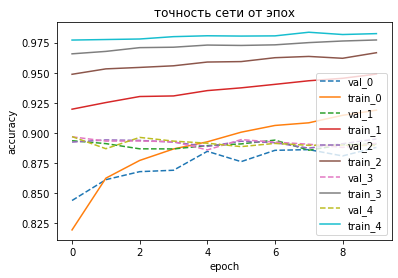

CPU times: user 52.4 s, sys: 9.25 s, total: 1min 1s
Wall time: 45.6 s


In [12]:
%%time

num_test = 1
note = 'Однослойная полносвязная'
input = Input(shape=(28, 28, 1))

x = Flatten()(input)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

statistic = model_compile(input, x, statistic=statistic, num_test=num_test, batch_size=100, epochs=10, note=note, train_images=train_images, train_labels=train_labels, repeat=5, verbose=0)

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 12,851,018
Trainable params: 12,851,018
Non-trainable params: 0
_________________________________________

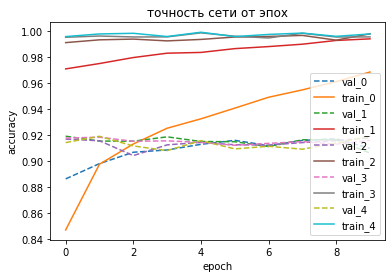

CPU times: user 1min 9s, sys: 15 s, total: 1min 24s
Wall time: 2min 28s


In [13]:
%%time

num_test = 2
note = 'conv32+max3_3+full512'

input = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), padding='same', activation='relu')(input)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

statistic = model_compile(input, x, statistic=statistic, num_test=num_test, batch_size=100, epochs=10, note=note, train_images=train_images, train_labels=train_labels, repeat=5, verbose=0)

Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)             

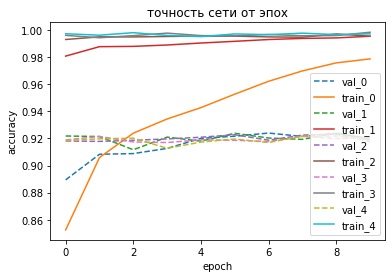

CPU times: user 1min 17s, sys: 14.6 s, total: 1min 31s
Wall time: 3min 22s


In [14]:
%%time

num_test = 3
note = '(conv32+max3_3)х2+full512'

input = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), padding='same', activation='relu')(input)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

statistic = model_compile(input, x, statistic=statistic, num_test=num_test, batch_size=100, epochs=10, note=note, train_images=train_images, train_labels=train_labels, repeat=5, verbose=0)

Model: "functional_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 28, 28, 32)      

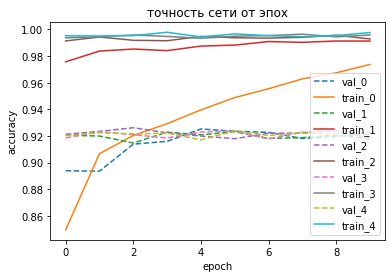

CPU times: user 1min 24s, sys: 16 s, total: 1min 40s
Wall time: 4min 19s


In [15]:
%%time


num_test = 4
note = '(conv32+max3_3)х3+full512'

input = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), padding='same', activation='relu')(input)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

statistic = model_compile(input, x, statistic=statistic, num_test=num_test, batch_size=100, epochs=10, note=note, train_images=train_images, train_labels=train_labels, repeat=5, verbose=0)

Model: "functional_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 28, 28, 32)      

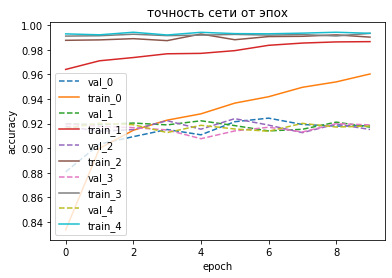

CPU times: user 1min 33s, sys: 17.5 s, total: 1min 50s
Wall time: 5min 14s


In [16]:
%%time

num_test = 5
note = '(conv32+max3_3)х4+full512'

input = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), padding='same', activation='relu')(input)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

statistic = model_compile(input, x, statistic=statistic, num_test=num_test, batch_size=100, epochs=10, note=note, train_images=train_images, train_labels=train_labels, repeat=5, verbose=0)

Model: "functional_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 28, 28, 32)      

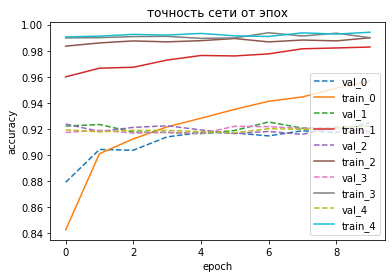

CPU times: user 1min 41s, sys: 19.3 s, total: 2min
Wall time: 6min 11s


In [17]:
%%time

num_test = 6
note = '(conv32+max3_3)х5+full512'

input = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), padding='same', activation='relu')(input)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

statistic = model_compile(input, x, statistic=statistic, num_test=num_test, batch_size=100, epochs=10, note=note, train_images=train_images, train_labels=train_labels, repeat=5, verbose=0)

Model: "functional_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 28, 28, 32)      

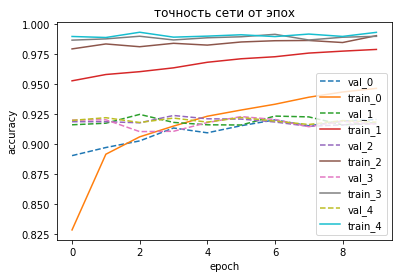

CPU times: user 1min 49s, sys: 20.8 s, total: 2min 9s
Wall time: 7min 6s


In [18]:
%%time

num_test = 7
note = '(conv32+max3_3)х6+full512'

input = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), padding='same', activation='relu')(input)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

statistic = model_compile(input, x, statistic=statistic, num_test=num_test, batch_size=100, epochs=10, note=note, train_images=train_images, train_labels=train_labels, repeat=5, verbose=0)

In [19]:
for i in statistic:
    print(f'Номер испытания: {i:2}', end=' ')
    print(f'val_accuracy: {statistic[i]["val_accuracy"]:2.4f}', end=' ')
    print(f'accuracy: {statistic[i]["accuracy"]:2.4f}', end=' ')
    print(f'примечание: {statistic[i]["note"]}')

Номер испытания:  1 val_accuracy: 0.8948 accuracy: 0.9666 примечание: Однослойная полносвязная
Номер испытания:  2 val_accuracy: 0.9189 accuracy: 0.9975 примечание: conv32+max3_3+full512
Номер испытания:  3 val_accuracy: 0.9205 accuracy: 0.9985 примечание: (conv32+max3_3)х2+full512
Номер испытания:  4 val_accuracy: 0.9227 accuracy: 0.9977 примечание: (conv32+max3_3)х3+full512
Номер испытания:  5 val_accuracy: 0.9189 accuracy: 0.9935 примечание: (conv32+max3_3)х4+full512
Номер испытания:  6 val_accuracy: 0.9251 accuracy: 0.9566 примечание: (conv32+max3_3)х5+full512
Номер испытания:  7 val_accuracy: 0.9208 accuracy: 0.9467 примечание: (conv32+max3_3)х6+full512


Увеличение слоев свертки незначительно добавляет точность.А с 6 экспиримента она начала ухудшаться. 
Вернемся к  (conv32+max3_3)х2+full1024 и увеличим кол-во параметров

Model: "functional_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)             

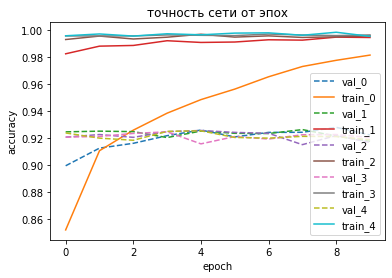

CPU times: user 1min 32s, sys: 21.1 s, total: 1min 53s
Wall time: 6min 37s


In [21]:
%%time

num_test = 8
note = '(conv64+max3_3)х2+full512'

input = Input(shape=(28, 28, 1))

x = Conv2D(64, (3, 3), padding='same', activation='relu')(input)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

statistic = model_compile(input, x, statistic=statistic, num_test=num_test, batch_size=100, epochs=10, note=note, train_images=train_images, train_labels=train_labels, repeat=5, verbose=0)

Утолщение сети не дало прибавки
Пойдем на уменьшение сети.

Model: "functional_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 22, 22, 20)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 20, 20, 25)        4525      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 18, 18, 25)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 8100)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)             

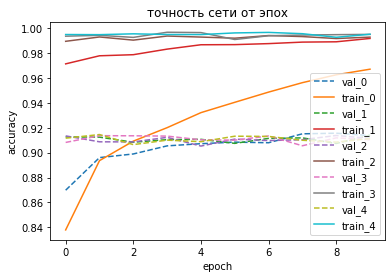

CPU times: user 1min 13s, sys: 11 s, total: 1min 24s
Wall time: 1min 33s


In [22]:
%%time

num_test = 9
note = 'conv20+max3_3+conv25+max3_3+full512'

input = Input(shape=(28, 28, 1))

x = Conv2D(20, (5, 5), padding='valid', activation='relu')(input)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid')(x)
x = Conv2D(25, (3, 3), padding='valid', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid')(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

statistic = model_compile(input, x, statistic=statistic, num_test=num_test, batch_size=100, epochs=10, note=note, train_images=train_images, train_labels=train_labels, repeat=5, verbose=0)

Потерял точность

Model: "functional_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 22, 22, 28)        8092      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 22, 22, 28)        7084      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 22, 22, 18)        4554      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 21, 21, 18)      

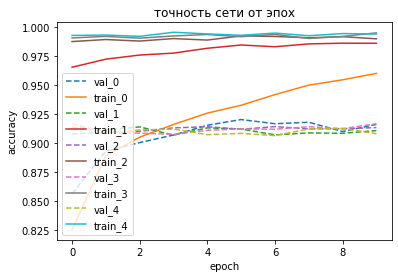

CPU times: user 1min 33s, sys: 13.1 s, total: 1min 46s
Wall time: 2min 42s


In [23]:
%%time

num_test = 10
note = 'conv32+max3_3+conv28+conv28+conv18+conv18+max3_3+full512'

input = Input(shape=(28, 28, 1))

x = Conv2D(32, (5, 5), padding='valid', activation='relu')(input)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid')(x)
x = Conv2D(28, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(28, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(18, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(18, (2, 2), padding='valid', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid')(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

statistic = model_compile(input, x, statistic=statistic, num_test=num_test, batch_size=100, epochs=10, note=note, train_images=train_images, train_labels=train_labels, repeat=5, verbose=0)

Model: "functional_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 18, 18, 28)        22428     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 28)        7084      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 15, 15, 28)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 6300)           

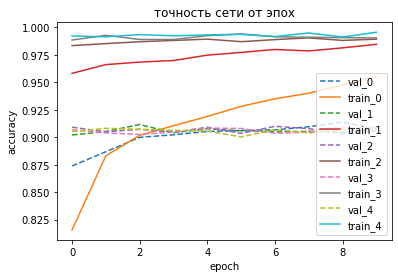

CPU times: user 1min 23s, sys: 11.5 s, total: 1min 35s
Wall time: 1min 56s


In [24]:
%%time

num_test = 11
note = 'conv32+max3_3+conv28+conv28+max2_2+full256+full256'

input = Input(shape=(28, 28, 1))

x = Conv2D(32, (5, 5), padding='valid', activation='relu')(input)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid')(x)
x = Conv2D(28, (5, 5), padding='valid', activation='relu')(x)
x = Conv2D(28, (3, 3), padding='valid', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

statistic = model_compile(input, x, statistic=statistic, num_test=num_test, batch_size=100, epochs=10, note=note, train_images=train_images, train_labels=train_labels, repeat=5, verbose=0)

Model: "functional_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 20, 20, 56)        16184     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 19, 19, 56)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 20216)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)            

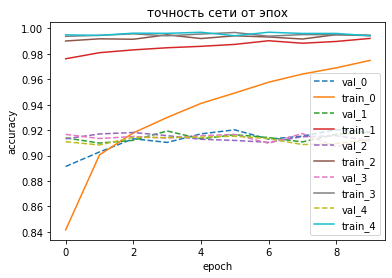

CPU times: user 1min 16s, sys: 12.4 s, total: 1min 29s
Wall time: 2min 11s


In [25]:
%%time

num_test = 12
note = 'conv32+max3_3+conv56+max2_2+full256+full256'

input = Input(shape=(28, 28, 1))

x = Conv2D(32, (5, 5), padding='valid', activation='relu')(input)
x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid')(x)
x = Conv2D(56, (3, 3), padding='valid', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

statistic = model_compile(input, x, statistic=statistic, num_test=num_test, batch_size=100, epochs=10, note=note, train_images=train_images, train_labels=train_labels, repeat=5, verbose=0)

Model: "functional_125"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 6, 6, 56)          16184     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 3, 3, 56)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 504)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)            

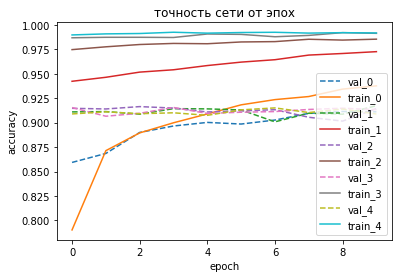

CPU times: user 1min 11s, sys: 8.89 s, total: 1min 20s
Wall time: 1min 2s


In [26]:
%%time

num_test = 13
note = 'conv32+max3_3+conv56+max2_2+full256+full256'

input = Input(shape=(28, 28, 1))

x = Conv2D(32, (5, 5), padding='valid', activation='relu')(input)
x = MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='valid')(x)
x = Conv2D(56, (3, 3), padding='valid', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

statistic = model_compile(input, x, statistic=statistic, num_test=num_test, batch_size=100, epochs=10, note=note, train_images=train_images, train_labels=train_labels, repeat=5, verbose=0)

Model: "functional_135"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 22, 22, 28)        1400      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 7, 7, 28)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 7, 7, 56)          14168     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 6, 6, 56)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 2016)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)            

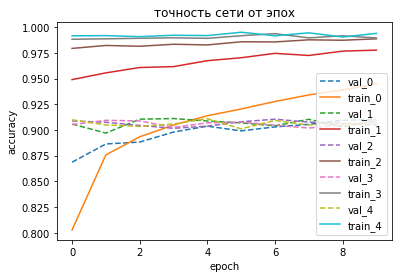

CPU times: user 1min 11s, sys: 8.2 s, total: 1min 19s
Wall time: 1min 2s


In [27]:
%%time

num_test = 14
note = 'conv28+max3_3+conv56+max2_2+full256+full256'

input = Input(shape=(28, 28, 1))

x = Conv2D(28, (7, 7), padding='valid', activation='tanh')(input)
x = MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='valid')(x)
x = Conv2D(56, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

statistic = model_compile(input, x, statistic=statistic, num_test=num_test, batch_size=100, epochs=10, note=note, train_images=train_images, train_labels=train_labels, repeat=5, verbose=0)

In [28]:
for i in statistic:
    print(f'Номер испытания: {i:2}', end=' ')
    print(f'val_accuracy: {statistic[i]["val_accuracy"]:2.4f}', end=' ')
    print(f'accuracy: {statistic[i]["accuracy"]:2.4f}', end=' ')
    print(f'примечание: {statistic[i]["note"]}')

Номер испытания:  1 val_accuracy: 0.8948 accuracy: 0.9666 примечание: Однослойная полносвязная
Номер испытания:  2 val_accuracy: 0.9189 accuracy: 0.9975 примечание: conv32+max3_3+full512
Номер испытания:  3 val_accuracy: 0.9205 accuracy: 0.9985 примечание: (conv32+max3_3)х2+full512
Номер испытания:  4 val_accuracy: 0.9227 accuracy: 0.9977 примечание: (conv32+max3_3)х3+full512
Номер испытания:  5 val_accuracy: 0.9189 accuracy: 0.9935 примечание: (conv32+max3_3)х4+full512
Номер испытания:  6 val_accuracy: 0.9251 accuracy: 0.9566 примечание: (conv32+max3_3)х5+full512
Номер испытания:  7 val_accuracy: 0.9208 accuracy: 0.9467 примечание: (conv32+max3_3)х6+full512
Номер испытания:  8 val_accuracy: 0.9224 accuracy: 0.9817 примечание: (conv64+max3_3)х2+full512
Номер испытания:  9 val_accuracy: 0.9139 accuracy: 0.9916 примечание: conv20+max3_3+conv25+max3_3+full512
Номер испытания: 10 val_accuracy: 0.9167 accuracy: 0.9948 примечание: conv32+max3_3+conv28+conv28+conv18+conv18+max3_3+full512
Номе

Преодолеть потолок .0.92 мне так и не удалось. От роста сети в длину и в ширь точность не увеличивается или увеличивается незначительно. 
Как показали последние эксперименты можно значительно сократить кол-во настраиваемых параметров растянув сеть в длину и уменьшив толщину, потеряв немного в точности. Однако как преодолеть потолок непонятно. 